EDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
books = pd.read_csv('data/Books.csv')
users = pd.read_csv('data/Users.csv')
ratings = pd.read_csv('data/Ratings.csv')

C:\Users\bhavy\AppData\Local\Temp\ipykernel_8188\927319382.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/Books.csv')


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
books.shape, users.shape, ratings.shape

((271360, 8), (278858, 3), (1149780, 3))

In [8]:
# Merge Ratings and Books on ISBN
ratings_books = pd.merge(ratings, books, on='ISBN')
# Merge ratings_books and Users on User-ID
ratings_books_users = pd.merge(ratings_books, users, on='User-ID')
ratings_books_users.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


In [9]:
ratings_books_users.shape

(1031136, 12)

In [10]:
ratings_books_users.duplicated().sum()

0

In [11]:
ratings_books_users.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
Location                    0
Age                    277835
dtype: int64

In [12]:
# Drop age column
ratings_books_users.drop(columns='Age', inplace=True)

# Drop the rows with missing values
ratings_books_users.dropna(inplace=True)
ratings_books_users.shape

(1031128, 11)

In [13]:
ratings_books_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031128 entries, 0 to 1031135
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031128 non-null  int64 
 1   ISBN                 1031128 non-null  object
 2   Book-Rating          1031128 non-null  int64 
 3   Book-Title           1031128 non-null  object
 4   Book-Author          1031128 non-null  object
 5   Year-Of-Publication  1031128 non-null  object
 6   Publisher            1031128 non-null  object
 7   Image-URL-S          1031128 non-null  object
 8   Image-URL-M          1031128 non-null  object
 9   Image-URL-L          1031128 non-null  object
 10  Location             1031128 non-null  object
dtypes: int64(2), object(9)
memory usage: 94.4+ MB


In [14]:
# Convert Year-Of-Publication to int
ratings_books_users['Year-Of-Publication'] = ratings_books_users['Year-Of-Publication'].astype(int)

In [15]:
# Count the number of books published each year and sort based on year
ratings_books_users['Year-Of-Publication'].value_counts().sort_index()

Year-Of-Publication
0       14009
1376        1
1378        1
1806        1
1897        1
        ...  
2026        5
2030       32
2037        1
2038        8
2050        7
Name: count, Length: 116, dtype: int64

In [16]:
# Drop columns with year of publication more than 2024 and less than 1376
ratings_books_users = ratings_books_users[ratings_books_users['Year-Of-Publication'] >= 1376]
ratings_books_users = ratings_books_users[ratings_books_users['Year-Of-Publication'] <= 2024]
ratings_books_users['Year-Of-Publication'].value_counts().sort_values(ascending=False)

Year-Of-Publication
2002    91799
2001    79800
1999    75193
2003    72538
2000    72326
        ...  
1917        1
1919        1
1914        1
1906        1
1910        1
Name: count, Length: 110, dtype: int64

In [17]:
# convert book rating column to int
ratings_books_users['Book-Rating'] = ratings_books_users['Book-Rating'].astype(int)
# Find the stats for this column
ratings_books_users['Book-Rating'].describe().astype(int)

count    1017066
mean           2
std            3
min            0
25%            0
50%            0
75%            7
max           10
Name: Book-Rating, dtype: int32

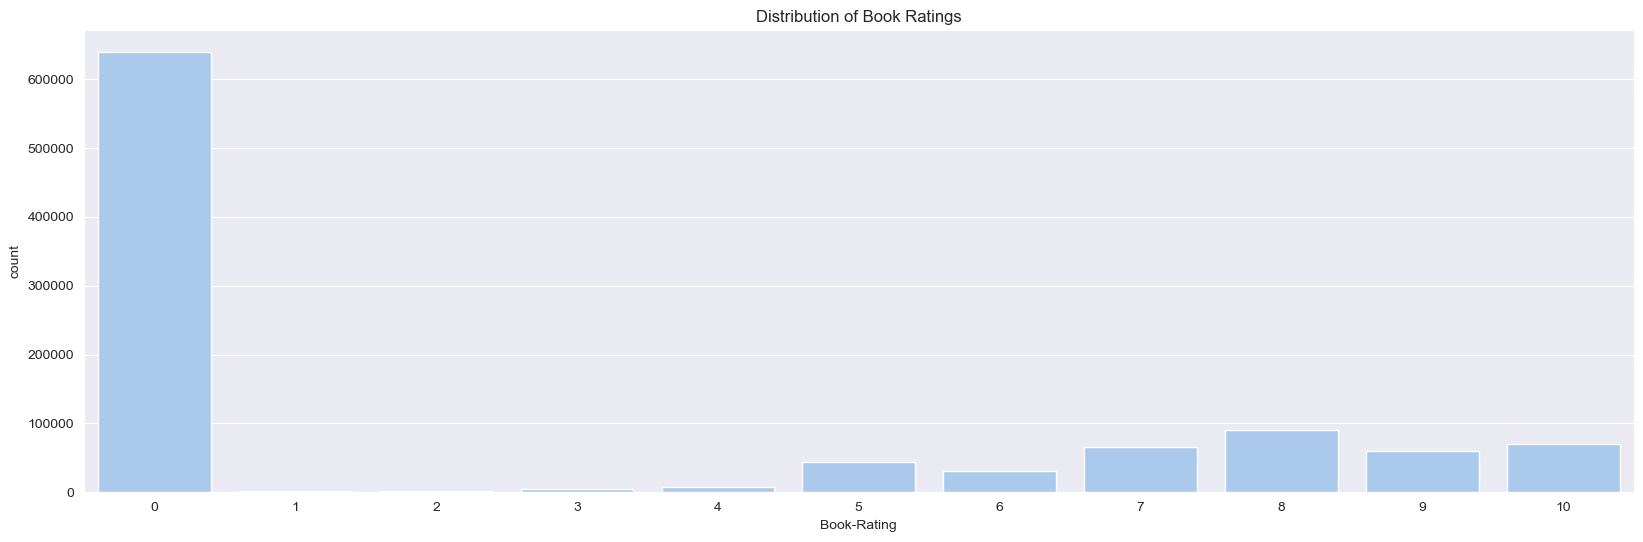

In [18]:
# Plot the distribution of book ratings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(20,6))
sns.countplot(x='Book-Rating', data=ratings_books_users)
plt.title('Distribution of Book Ratings')
plt.show()

In [19]:
# Find the number of unique users and books
n_users = ratings_books_users['User-ID'].nunique()
n_books = ratings_books_users['Book-Title'].nunique()
print(f'Number of unique users: {n_users} and unique books: {n_books}')

Number of unique users: 90679 and unique books: 237448


In [20]:
# Find the average number of ratings per user
avg_ratings_per_user = ratings_books_users.groupby('User-ID')['Book-Rating'].count().mean()
print(f'Average number of ratings per user: {avg_ratings_per_user:.2f}')

Average number of ratings per user: 11.22


In [21]:
# Find the average number of ratings per book
avg_ratings_per_book = ratings_books_users.groupby('Book-Title')['Book-Rating'].count().mean()
print(f'Average number of ratings per book: {avg_ratings_per_book:.2f}')

Average number of ratings per book: 4.28


In [22]:
# Find unique locations
n_locations = ratings_books_users['Location'].unique()
print(f'Unique locations: {n_locations}')

Unique locations: ['tyler, texas, usa' 'seattle, washington, usa'
 'h, new south wales, australia' ... 'reeves, louisiana, usa'
 'wakeman, ohio, usa' 'mannington, west virginia, usa']


In [23]:
# Split the location into multiple parts and assign it to separate columns
split_locations = ratings_books_users['Location'].str.split(',', expand=True)

# Make sure to capture only the last two parts as Country, and the others as City or State
ratings_books_users['City'] = split_locations[0]  
ratings_books_users['State'] = split_locations[1] 
ratings_books_users['Country'] = split_locations[2] 
# Remove leading and trailing whitespaces
ratings_books_users['City'] = ratings_books_users['City'].str.strip()
ratings_books_users['State'] = ratings_books_users['State'].str.strip()
ratings_books_users['Country'] = ratings_books_users['Country'].str.strip()

In [24]:
# Check the result
ratings_books_users[['Location','City','State','Country']].head()

,Location,City,State,Country
0,"tyler, texas, usa",tyler,texas,usa
1,"seattle, washington, usa",seattle,washington,usa
2,"h, new south wales, australia",h,new south wales,australia
3,"rijeka, n/a, croatia",rijeka,n/a,croatia
4,"rijeka, n/a, croatia",rijeka,n/a,croatia


In [25]:
# Calculate the number of n/a values in the City column
print(ratings_books_users['City'].value_counts().loc['n/a'])
print(ratings_books_users['State'].value_counts().loc['n/a'])
print(ratings_books_users['Country'].value_counts().loc['n/a'])

13569
18804
10964


In [26]:
# Calculate the unique values in the City, State, and Country columns
print(ratings_books_users['City'].nunique())
print(ratings_books_users['State'].nunique())
print(ratings_books_users['Country'].nunique())

14434
1893
399


In [27]:
# Drop the Location column
ratings_books_users.drop(columns='Location', inplace=True)

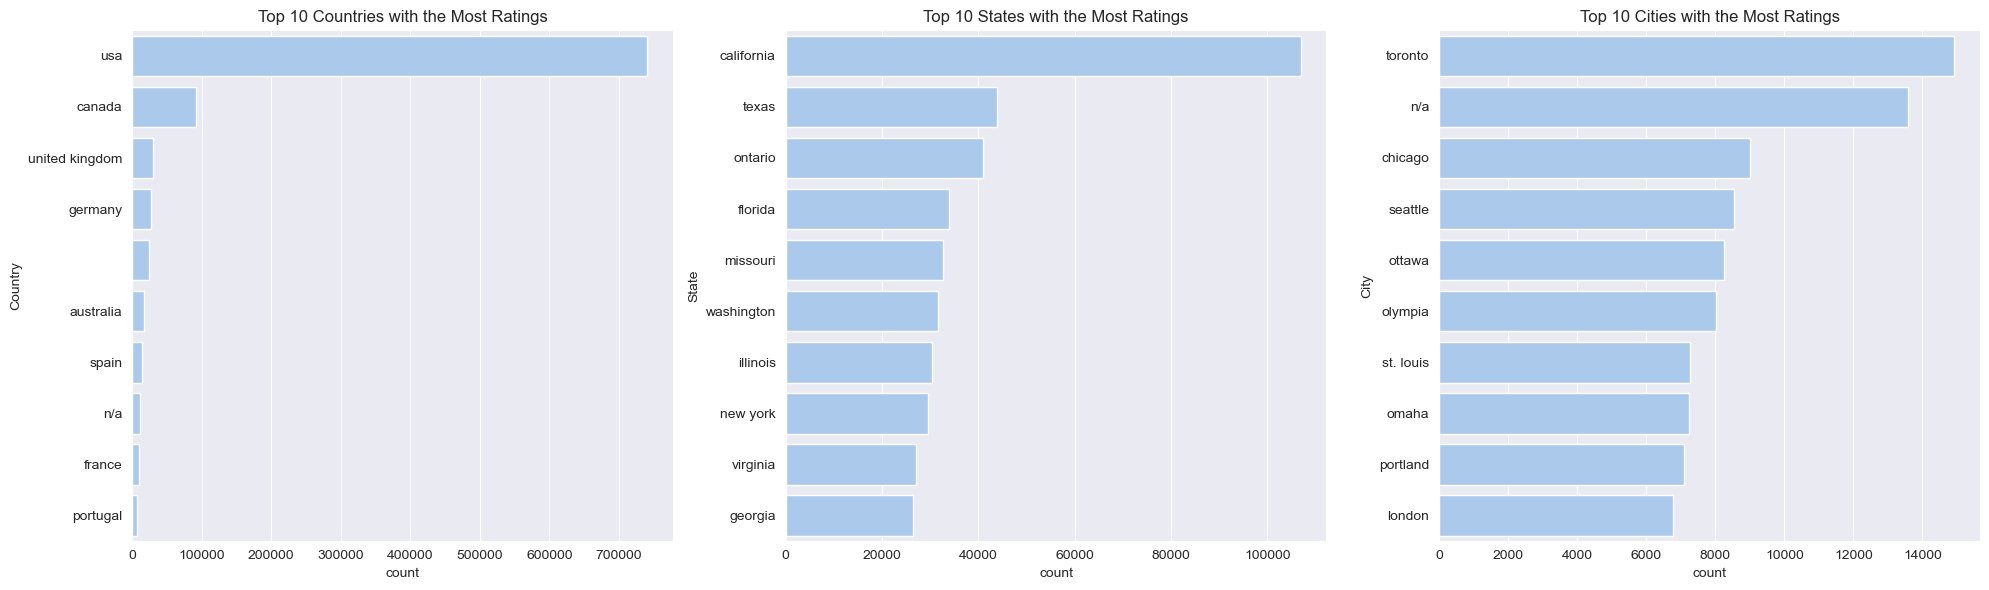

In [28]:
# Plot top 10 countries, cities, and states with the most ratings in three different graphs
top_countries = ratings_books_users['Country'].value_counts().head(10)
top_states = ratings_books_users['State'].value_counts().head(10)
top_cities = ratings_books_users['City'].value_counts().head(10)
plt.figure(figsize=(20,6))
sns.set_palette('pastel')
sns.set_style('darkgrid')

plt.subplot(1,3,1)
sns.barplot(x=top_countries, y=top_countries.index)
plt.title('Top 10 Countries with the Most Ratings')

plt.subplot(1,3,2)
sns.barplot(x=top_states, y=top_states.index)
plt.title('Top 10 States with the Most Ratings')

plt.subplot(1,3,3)
sns.barplot(x=top_cities, y=top_cities.index)
plt.title('Top 10 Cities with the Most Ratings')

plt.tight_layout()
plt.show()

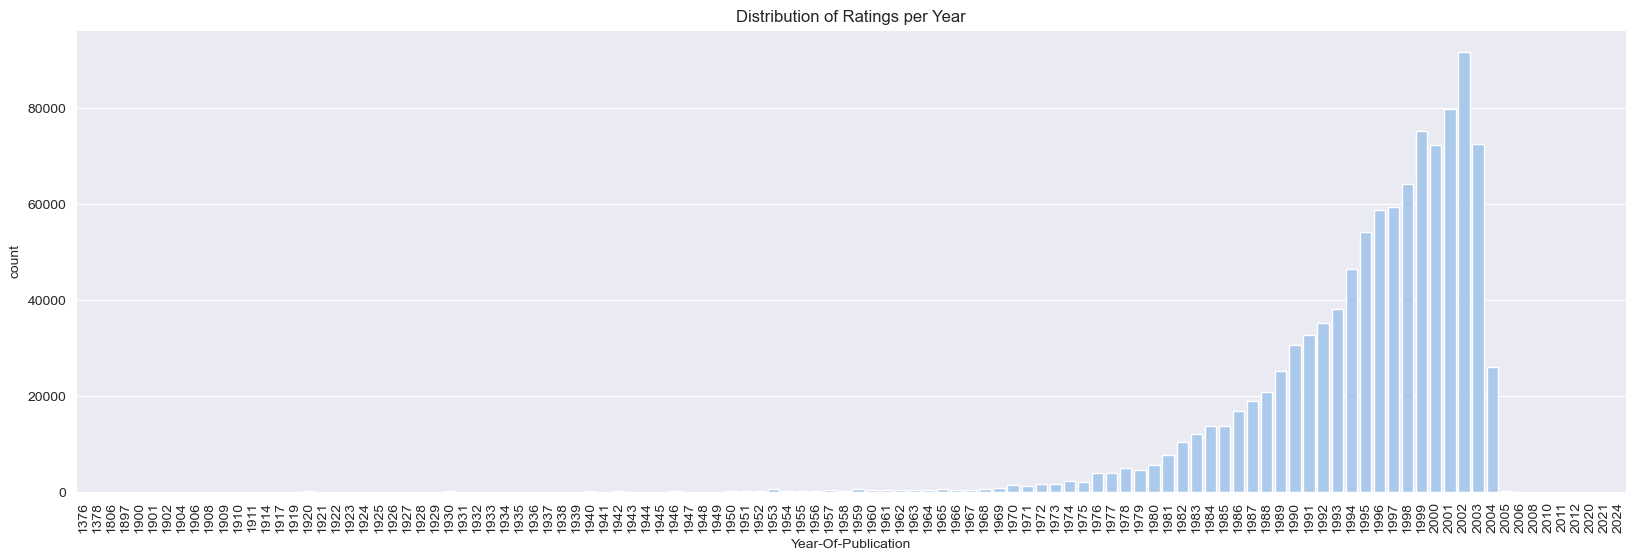

In [29]:
# plot the distribution of ratings per year
plt.figure(figsize=(20,6))
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.countplot(x='Year-Of-Publication', data=ratings_books_users)
plt.title('Distribution of Ratings per Year')
plt.xticks(rotation=90)
plt.show()
# Most books were published between 1970 and 2005
# Most ratings were given to books published between 1995 to 2003

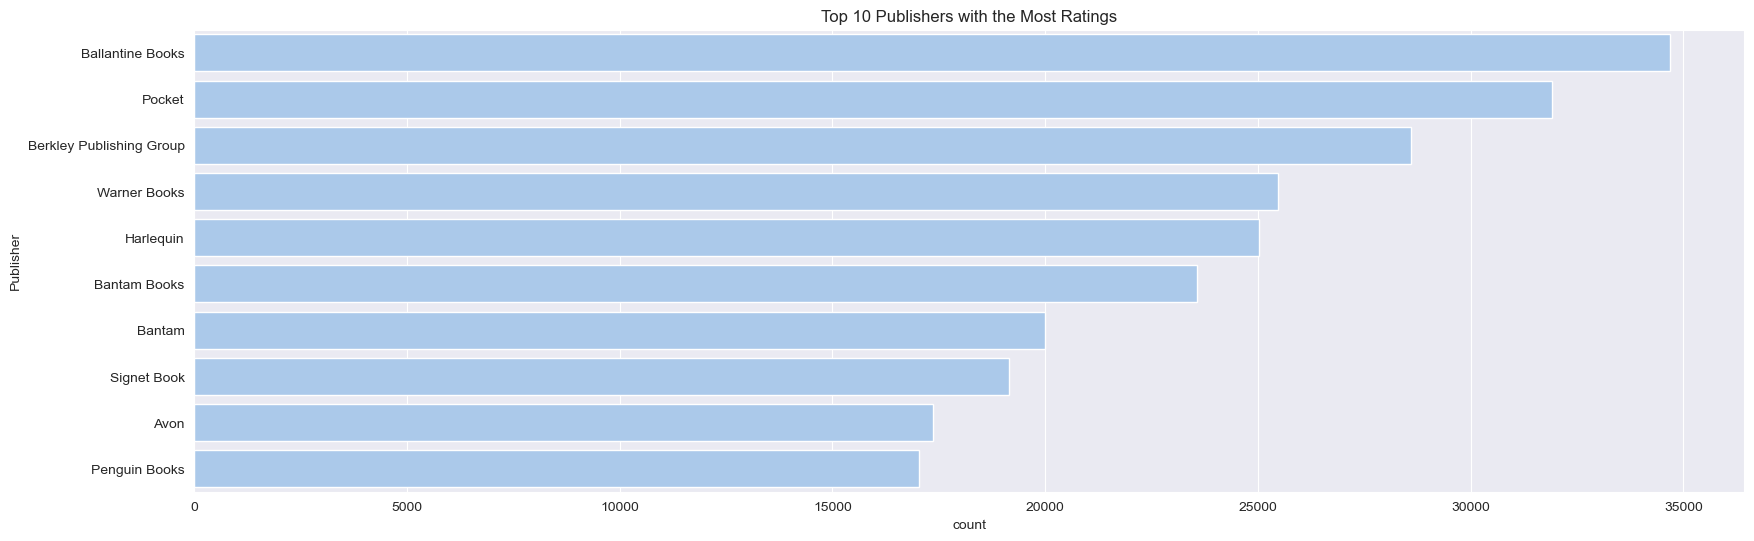

In [34]:
# Plot the publishers with the most ratings vs the number of ratings
top_publishers = ratings_books_users['Publisher'].value_counts().head(10)
plt.figure(figsize=(20,6))
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.barplot(x=top_publishers, y=top_publishers.index)
plt.title('Top 10 Publishers with the Most Ratings')
plt.show()

In [31]:
# Convert the updated DataFrame to a CSV file
ratings_books_users.to_csv('data/ratings_books_users.csv', index=False)